<a href="https://colab.research.google.com/github/rokzeezee/Machine-Learning-/blob/main/Copy_of_House_price__prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
df = pd.read_csv("/content/housing.csv")
df 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df .describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df[[i for i in df.columns if df[i].isnull().sum()]].isnull().sum()

total_bedrooms    207
dtype: int64

In [ ]:

df.total_bedrooms =df.total_bedrooms.fillna(0.0)
df.total_bedrooms.value_counts()





0.0       207
280.0      55
331.0      51
345.0      50
343.0      49
         ... 
2961.0      1
1915.0      1
1215.0      1
3298.0      1
1052.0      1
Name: total_bedrooms, Length: 1924, dtype: int64

In [ ]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
df.ocean_proximity

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [ ]:
# converting strings into 1's and Zeros 
#nominal encoding technique

df_encoding = pd.get_dummies(df[["ocean_proximity"]])

df_final = pd.concat([df, df_encoding],1)
df_final.drop(["ocean_proximity"] , axis = 1) 

df = df_final
df.columns

<ipython-input-14-2ff4fba0bb16>:6: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_final = pd.concat([df, df_encoding],1)


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
df=df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
        #'ocean_proximity', 
    'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN',
       #'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       #'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       #'ocean_proximity_NEAR OCEAN' , 
    'median_house_value' ]]

In [ ]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,0.321121,-0.055575,0.009446,-0.474489,0.045509,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,-0.446969,0.351166,-0.016572,0.358771,-0.160818,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,0.045300,-0.236645,0.017020,0.255172,0.021622,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,-0.003031,0.025624,-0.007572,-0.023022,-0.009175,0.134153
total_bedrooms,0.068082,-0.065318,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.016785,-0.004964,-0.004128,-0.019043,0.000055,0.049148
population,0.099773,-0.108785,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,0.074613,-0.020732,-0.010412,-0.060880,-0.024264,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.042435,-0.039402,-0.009077,-0.010093,0.001714,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.168876,-0.237496,-0.009228,0.056197,0.027344,0.688075
ocean_proximity_<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.016785,0.074613,0.042435,0.168876,1.000000,-0.607669,-0.013872,-0.314813,-0.342620,0.256617
ocean_proximity_INLAND,-0.055575,0.351166,-0.236645,0.025624,-0.004964,-0.020732,-0.039402,-0.237496,-0.607669,1.000000,-0.010614,-0.240887,-0.262163,-0.484859


<Axes: >

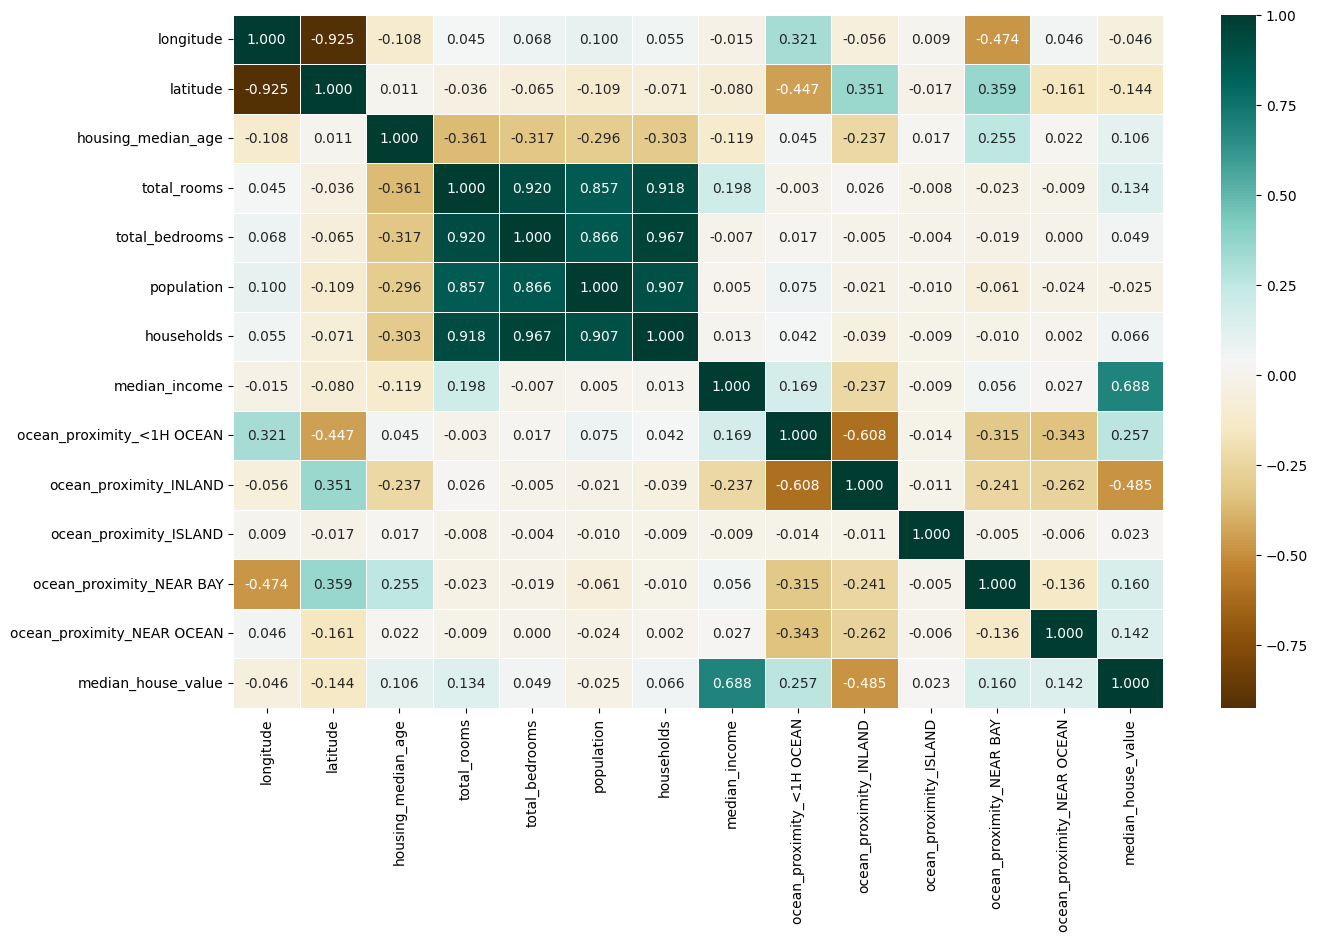

In [ ]:

cor_mat=df.corr()
fig,ax=plt.subplots(figsize=(15,9))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f" , cmap = "BrBG")

In [ ]:
X = df.iloc[: , 0: 15 ]
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0,84700.0


In [ ]:
y = df.median_house_value
y



0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split 

X_train,X_test , y_train , y_test = train_test_split(X,y,test_size = 0.25 ,random_state=42)
X_train.shape ,X_test.shape  , y_train.shape , y_test.shape


((15480, 14), (5160, 14), (15480,), (5160,))

<Axes: xlabel='latitude', ylabel='longitude'>

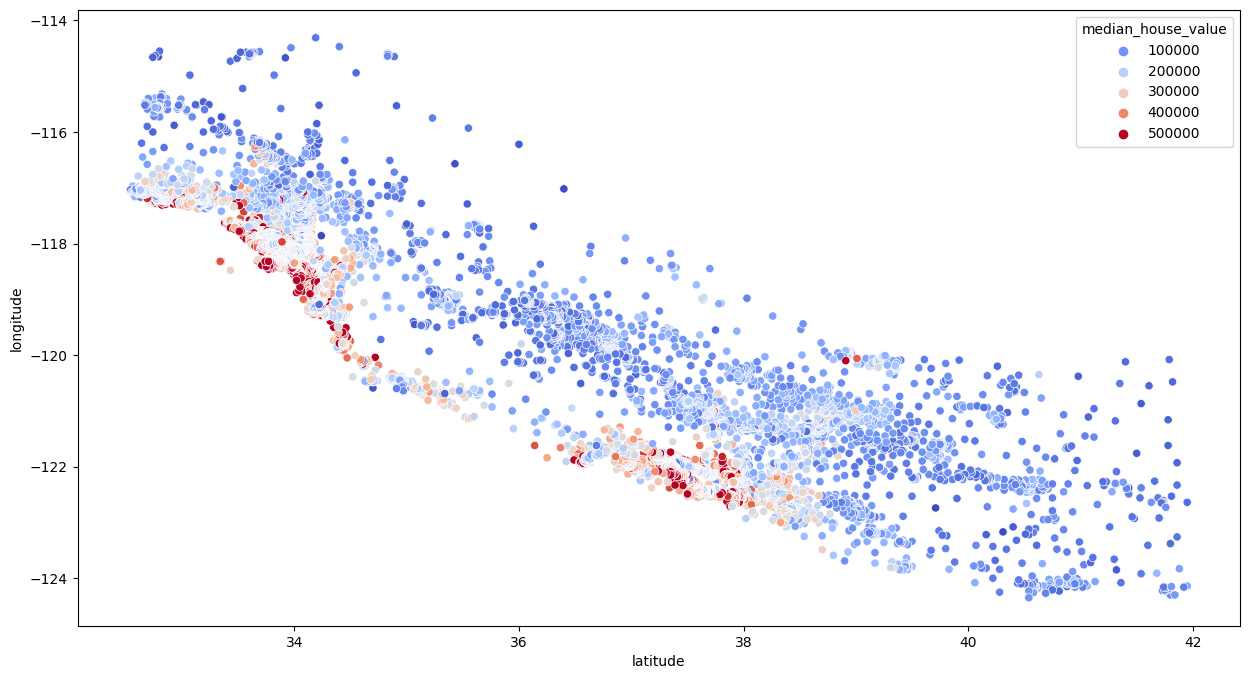

In [ ]:
plt.figure(figsize = (15,8))
sns.scatterplot(y = "longitude" ,x = "latitude" , data = df , hue  = "median_house_value"  , palette ="coolwarm")

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform ( X_test)

In [ ]:
from sklearn.svm import SVC
svm_model = SVC ()
svm_model.fit(X_train , y_train)





SVC()

In [ ]:
pred = svm_model.predict(X_test)

In [ ]:
score = svm_model.score(X_test,y_test)
score

0.05949612403100775

In [ ]:
from sklearn.linear_model import LinearRegression
LR_model =  LinearRegression()
LR_model.fit(X_train ,y_train)


LinearRegression()

In [ ]:
pred =LR_model.predict(X_test)


In [ ]:
score = LR_model.score(X_test,y_test)
score

1.0

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, pred)
     

1.0

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train , y_train) 


RandomForestRegressor()

In [ ]:
 pred_rfr =rfr.predict(X_test) 
 pred_rfr

array([ 47704.,  45522., 500001., ..., 117697., 263096., 481273.])

In [ ]:
score = rfr.score(X_test,y_test)
score

0.9999994508583557